### 데이터 구조 훑어보기

In [42]:
import pandas as pd
csv_path = 'delivery_raw.csv'
deliverys = pd.read_csv(csv_path, sep='\t')
deliverys.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [43]:
series=deliverys.isnull().any(axis=0)
series[series==True]

market_id                                       True
actual_delivery_time                            True
store_primary_category                          True
order_protocol                                  True
total_onshift                                   True
total_busy                                      True
total_outstanding_orders                        True
estimated_store_to_consumer_driving_duration    True
dtype: bool

In [44]:
deliverys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [45]:
deliverys.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


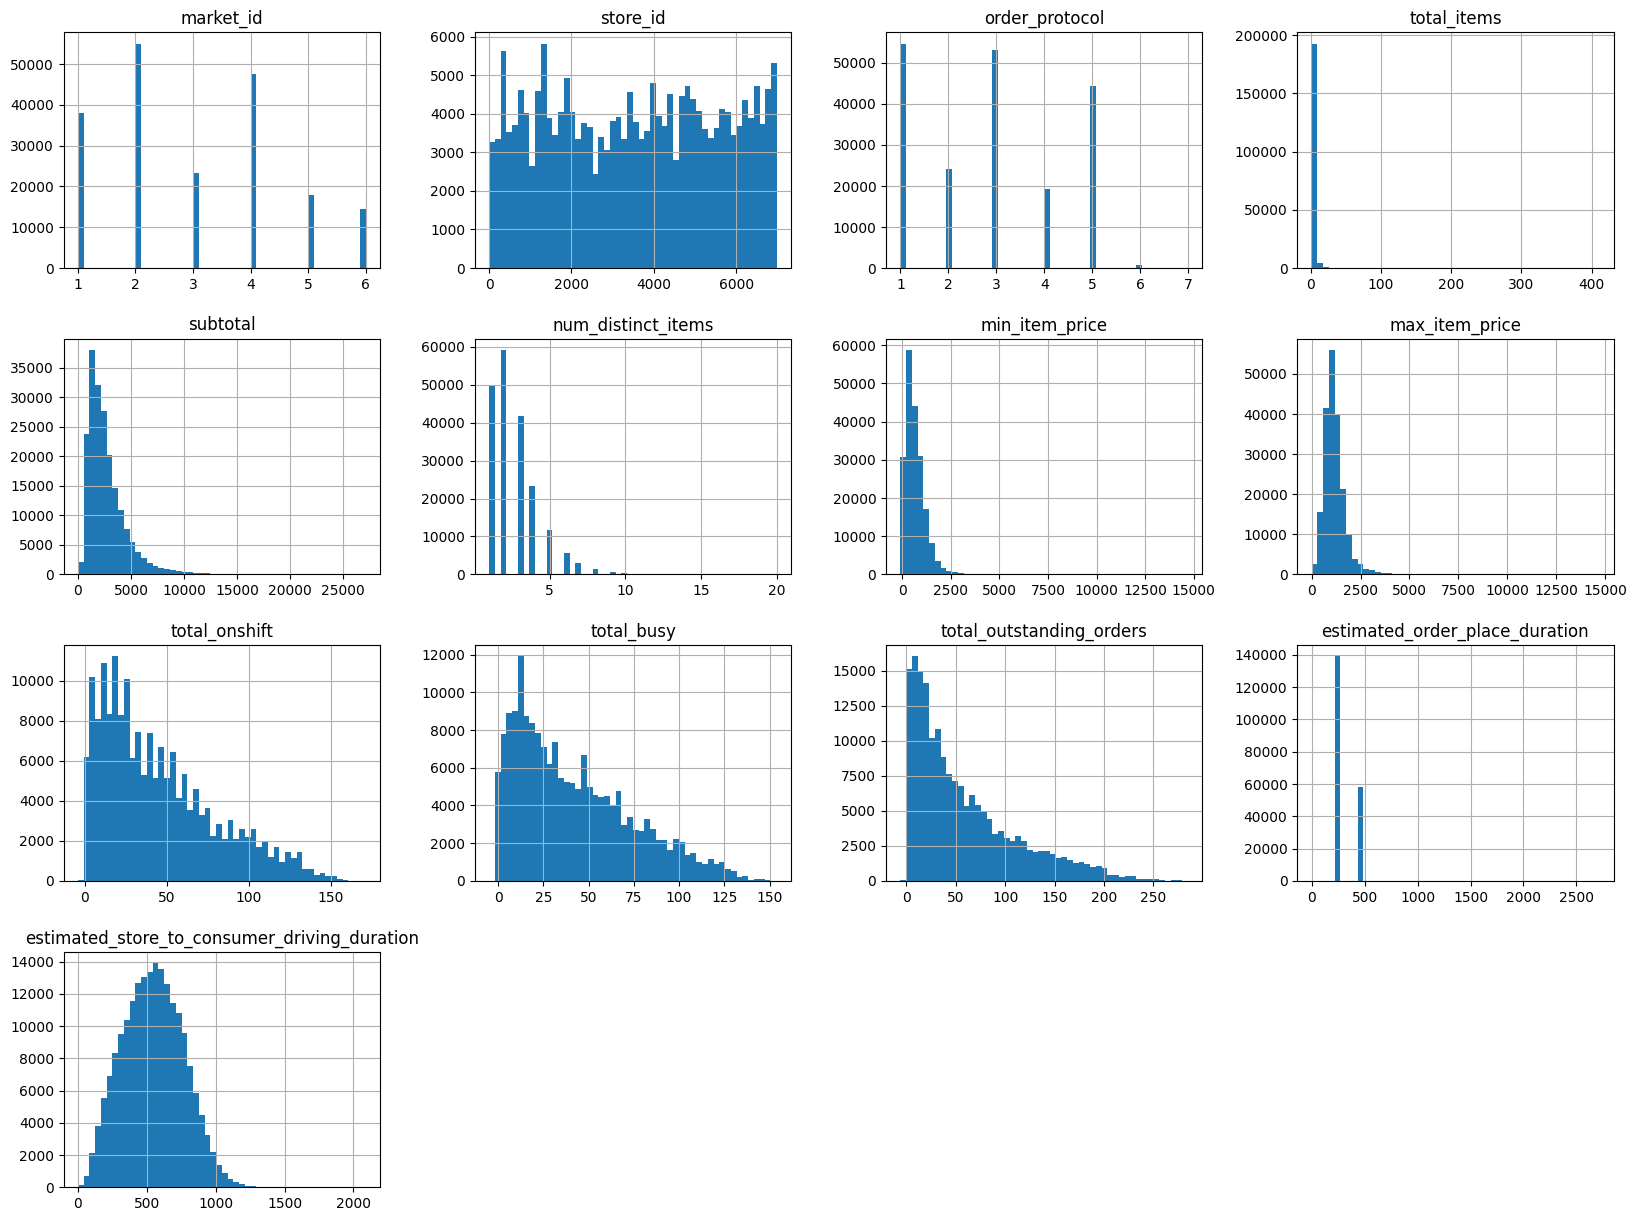

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
deliverys.hist(bins=50, figsize=(20,15))
plt.show()

### 데이터 전처리와 속성 생성

In [47]:
deliverys["actual_delivery_time"] = pd.to_datetime(deliverys["actual_delivery_time"])
deliverys["created_at"] = pd.to_datetime(deliverys["created_at"])
deliverys["taken_time"] = deliverys["actual_delivery_time"] - deliverys["created_at"]

In [48]:
deliverys['taken_time']=deliverys['taken_time'].dt.seconds

In [49]:
deliverys = deliverys.dropna(axis=0)

In [50]:
deliverys = deliverys.astype({'taken_time':'int64'})

### 테스트 데이터셋 만들기

In [51]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(deliverys, test_size=0.1, random_state=42)

In [52]:
train_set.shape, test_set.shape

((158199, 17), (17578, 17))

### 머신러닝 알고리즘을 위한 데이터 준비

In [53]:
deliverys = train_set.drop("taken_time", axis=1) # drop labels for training set
deliverys = deliverys.drop("actual_delivery_time", axis=1) 
deliverys_labels = train_set["taken_time"].copy()

In [54]:
deliverys['created_at']=pd.to_numeric(deliverys['created_at'])

### 특성 스케일링(Feature Scaling) 및 범주형 특성 다루기

In [56]:
deliverys_num = deliverys.drop("store_primary_category", axis=1)

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_attribs = list(deliverys_num)
cat_attribs = ["store_primary_category"]

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(sparse_output=False), cat_attribs),
    ])

deliverys_prepared = full_pipeline.fit_transform(deliverys)

### 모델 훈련(Train a Model)

In [58]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(deliverys_prepared, deliverys_labels)

LinearRegression()

### 테스트 데이터셋으로 최종 평가하기

In [59]:
X_test = test_set.drop("taken_time", axis=1) # drop labels for training set
X_test = X_test.drop("actual_delivery_time", axis=1) 
y_test = test_set["taken_time"].copy()

In [60]:
X_test['created_at']=pd.to_numeric(X_test['created_at'])

In [61]:
X_test_prepared = full_pipeline.transform(X_test)

In [62]:
import numpy as np
from sklearn.metrics import mean_squared_error
final_predictions = lin_reg.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

1045.893096844334

In [63]:
len(final_predictions[final_predictions<y_test])/len(final_predictions)

0.4171691887586756